# LogisticRegression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('A.csv')
df.head()

,DS,DP,DR,DL,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,NSP
0,0.0,0.0,0.0,0.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,0.0,0.0,0.0,2.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,1.0
2,0.0,0.0,0.0,2.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,1.0
3,0.0,0.0,0.0,2.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,1.0
4,0.0,0.0,0.0,0.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,1.0


In [3]:
df = df.drop_duplicates()
sum(df.duplicated())

0

In [4]:
df=df.dropna()
df

,DS,DP,DR,DL,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,NSP
0,0.0,0.0,0.0,0.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,0.0,0.0,0.0,2.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,1.0
2,0.0,0.0,0.0,2.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,1.0
3,0.0,0.0,0.0,2.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,1.0
4,0.0,0.0,0.0,0.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.0,0.0,0.0,0.0,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,2.0
2122,0.0,0.0,0.0,0.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,2.0
2123,0.0,0.0,0.0,0.0,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,2.0
2124,0.0,0.0,0.0,0.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,2.0


In [5]:
df.columns

Index(['DS', 'DP', 'DR', 'DL', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV',
       'ALTV', 'MLTV', 'NSP'],
      dtype='object')

In [6]:
x = df.drop(labels='NSP', axis=1)
Y = df.loc[:,'NSP']

In [7]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x,Y)
print("OUR DATASET COUNT         : ", Counter(Y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1.0: 1646, 2.0: 292, 3.0: 173})
OVER SAMPLING DATA COUNT  :  Counter({2.0: 1646, 1.0: 1646, 3.0: 1646})


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  3950
Number of test dataset     :  988
Total number of dataset    :  4938


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [10]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predicted = LR.predict(x_test)

In [11]:
cr = classification_report(y_test,predicted)
print('Classification report of LogisticRegression Result is:\n',cr)
print("\n")

Classification report of LogisticRegression Result is:
               precision    recall  f1-score   support

         1.0       0.82      0.75      0.78       329
         2.0       0.71      0.77      0.74       330
         3.0       0.81      0.81      0.81       329

    accuracy                           0.78       988
   macro avg       0.78      0.78      0.78       988
weighted avg       0.78      0.78      0.78       988





In [12]:
cm = confusion_matrix(y_test,predicted)
print('Confusion Matrix result of LogisticRegression is:',cm)
print("\n")

Confusion Matrix result of LogisticRegression is: [[248  57  24]
 [ 38 253  39]
 [ 18  46 265]]




In [13]:
accuracy = cross_val_score(LR, x, y, scoring='accuracy')
print('Cross validation test results of accuracy:', accuracy)
print("\n")

Cross validation test results of accuracy: [0.80161943 0.79352227 0.82995951 0.81965552 0.72340426]




In [14]:
a = accuracy.mean() * 100
print("Accuracy Result of LogisticRegression is:",a)

Accuracy Result of LogisticRegression is: 79.36321983354458


Confusion matrix-LogisticRegression:
[[248  57  24]
 [ 38 253  39]
 [ 18  46 265]]


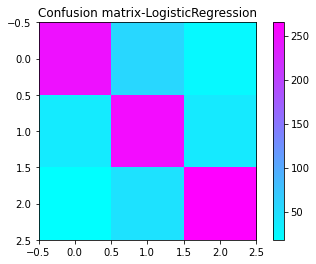

In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix-LogisticRegression', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('Confusion matrix-LogisticRegression:')
print(cm)
plot_confusion_matrix(cm)

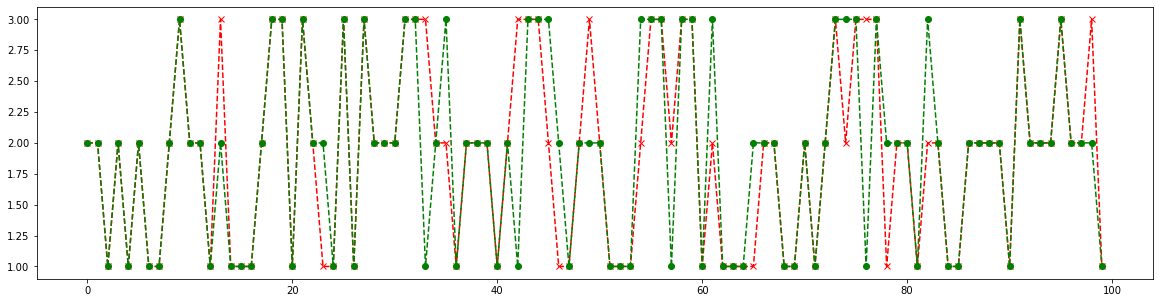

In [16]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()